In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
size = 256
method = ResizeMethod.SQUISH
method_str = "SQUISH"
bs = 32
model = models.resnet34
model_str = "resnet34"

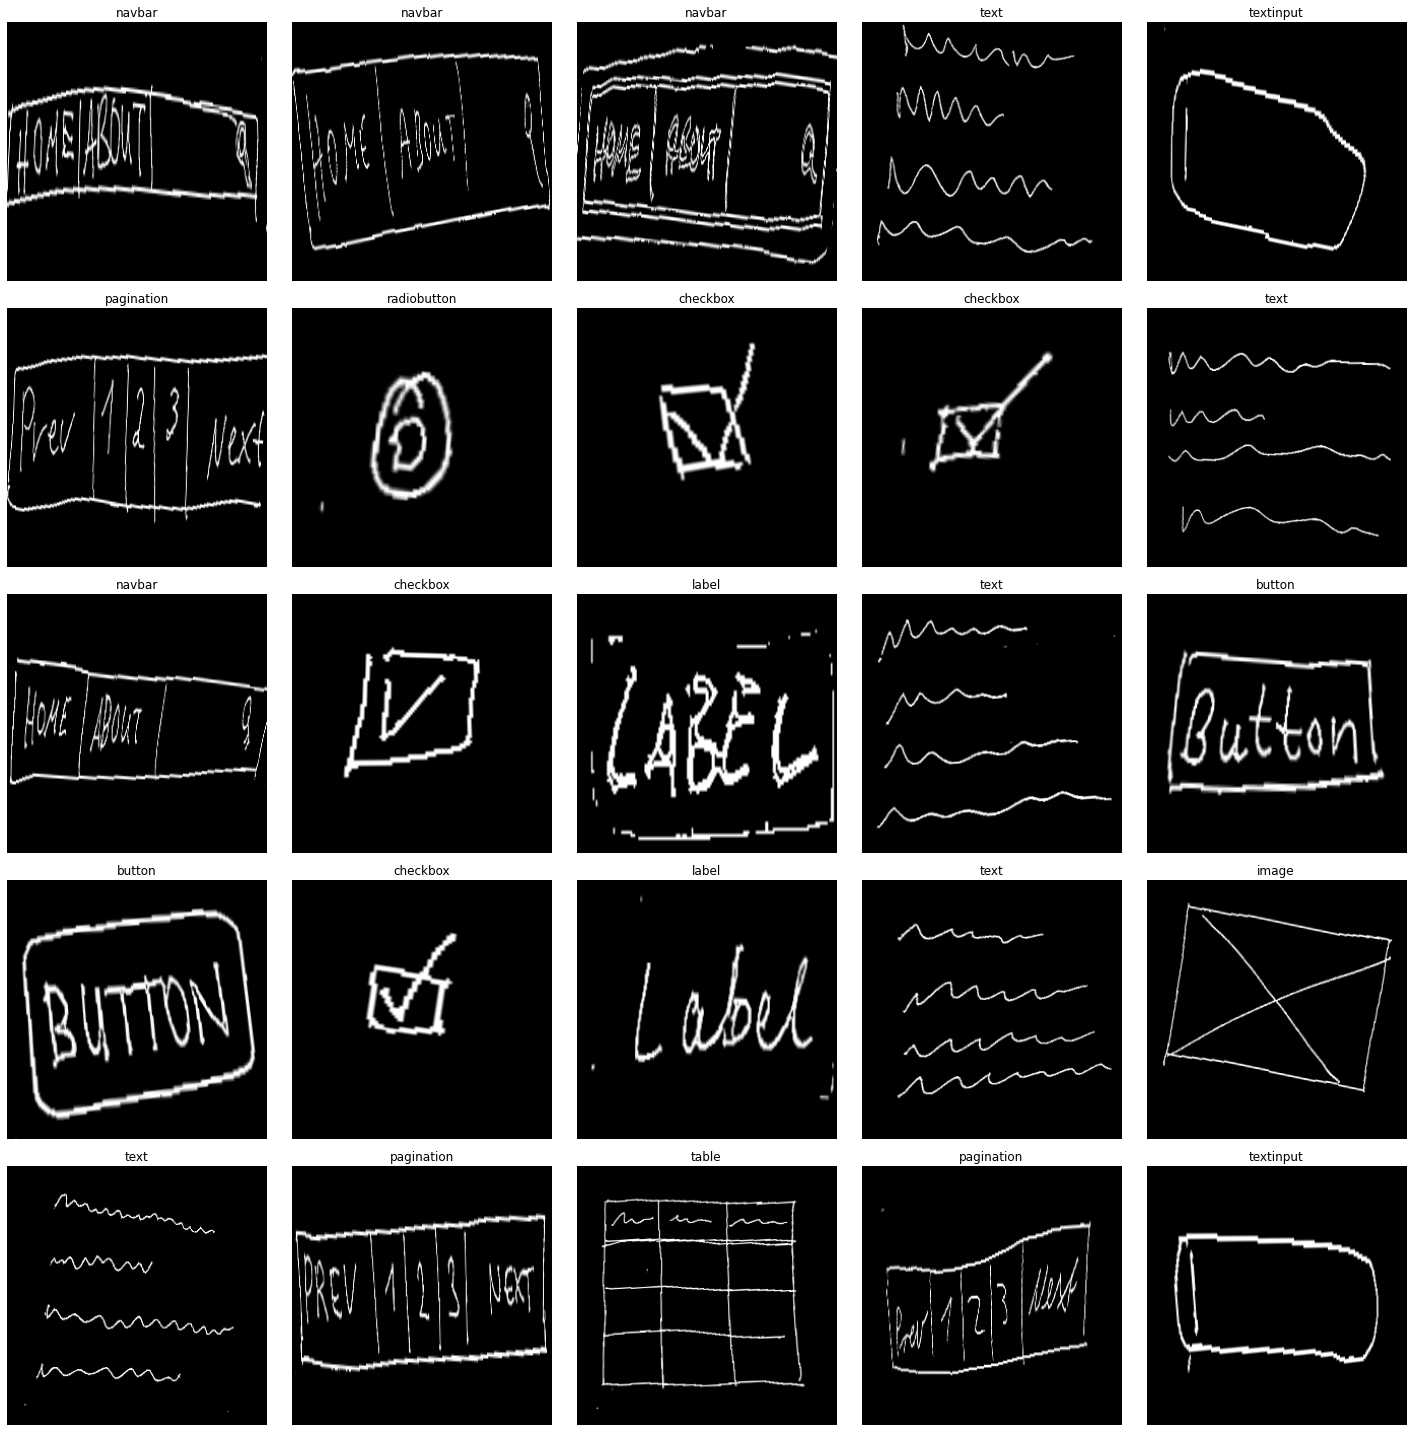

In [4]:
# TODO: remove image without cross
# stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])] ???
tfms = get_transforms(do_flip=False, max_lighting=None)
data = (
    ImageList.from_folder("data")
    .split_by_rand_pct()
    .label_from_folder()
    .transform(tfms, size=size, resize_method=method, padding_mode="zeros")
    .databunch(bs=bs)
    .normalize(imagenet_stats)
)
data.show_batch(rows=5)

In [5]:
learn = cnn_learner(data, model, metrics=accuracy)

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [ ]:
fig = learn.recorder.plot(suggestion=True, return_fig=True)
fig.savefig(f"training_{model_str}_size={size}_bs={bs}_lr_find.pdf")

epoch,train_loss,valid_loss,accuracy,time
0,3.161372,2.087992,0.298913,06:57
1,2.031790,0.336000,0.907609,06:54
2,1.197295,0.127804,0.951087,06:53
3,0.757210,0.063617,0.983696,06:56
4,0.514166,0.049393,0.989130,06:48
5,0.351205,0.065108,0.989130,06:46
6,0.238801,0.048961,0.983696,06:49
7,0.167184,0.055171,0.989130,06:49
8,0.122300,0.049934,0.989130,06:44
9,0.092761,0.038698,0.994565,06:48


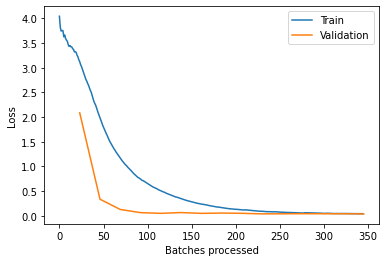

In [7]:
epochs = 15
lr = 1e-3
learn.fit_one_cycle(epochs, lr)
fig = learn.recorder.plot_losses(return_fig=True)
fig.savefig(f"training_{model_str}_size={size}_bs={bs}_lr={lr:.0e}_epochs={epochs}_loss_graph.pdf")

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

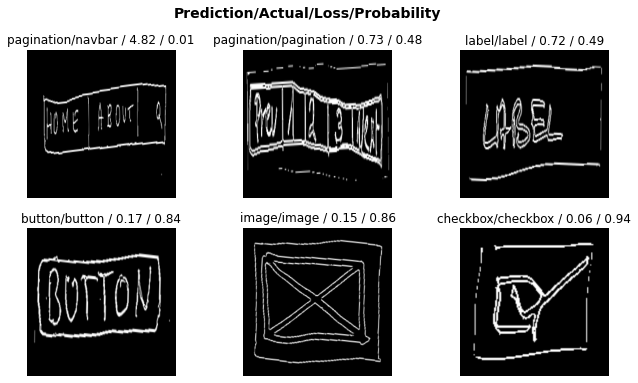

In [9]:
fig = interp.plot_top_losses(6, figsize=(11, 6), return_fig=True)
fig.savefig(f"training_{model_str}_size={size}_bs={bs}_lr={lr:.0e}_epochs={epochs}_top_losses.pdf")

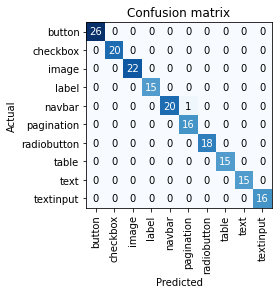

In [10]:
fig = interp.plot_confusion_matrix(return_fig=True)
fig.savefig(f"training_{model_str}_size={size}_bs={bs}_lr={lr:.0e}_epochs={epochs}_confusion_matrix.pdf")

In [11]:
interp.most_confused()

[('navbar', 'pagination', 1)]

In [12]:
learn.export(f"{model_str}_size={size}_bs={bs}_lr={lr:.0e}_epochs={epochs}_imagenet_stats.pkl")